In [8]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

# raymer's idea

# each row is a pairwise comparison between 2 amino acids
# 
# 2d features will be a single column
# 1d features will be one column each per amino acid
# i.e. psisolv for AA_1, psisolv for AA_2


pdb_list, length_dict, input_features = np.load("datasets/sample-input-features.npy",allow_pickle=True)
pdb_list_y, distance_maps_cb = np.load("datasets/sample-distance-maps-cb.npy",encoding="latin1",allow_pickle=True)


In [9]:
pairlist=[]
for full_pdb_id in pdb_list[0:5]:
    aa_length = length_dict[full_pdb_id]
    feats = input_features[full_pdb_id]
    # 1D Features
    psipred_helix = feats[0].astype(np.float)
    psipred_sheet = feats[1].astype(np.float)
    psipred_coil = feats[2].astype(np.float)
    psisolv = feats[3].astype(np.float)
    shannon = feats[4].astype(np.float)
    ccmpred = feats[5].astype(np.float)
    # 2D Features
    freecontact = feats[6].astype(np.float)
    pstat = feats[7].astype(np.float)
    cb_dist = distance_maps_cb[full_pdb_id].astype(np.float)
    # Reshape 2D features into 2D arrays (from 1D)
    ccmpred.shape = (aa_length, aa_length)
    cb_dist.shape = (aa_length, aa_length)
    freecontact.shape = (aa_length, aa_length)
    pstat.shape = (aa_length, aa_length)
    
    # O(nlog(n)) run time 
    for i in range(0, aa_length):
        for j in range(i + 1, aa_length):
            feat_dict = {}
            feat_dict['protein_id'] = full_pdb_id
            feat_dict['coords'] = f'({i}, {j})'
            feat_dict['sequence_distance'] = j - i
            feat_dict['psipred_helix_1'] = psipred_helix[i]
            feat_dict['psipred_helix_2'] = psipred_helix[j]
            feat_dict['psipred_sheet_1'] = psipred_sheet[i]
            feat_dict['psipred_sheet_1'] = psipred_sheet[j]
            feat_dict['psipred_coil_1'] = psipred_coil[i]
            feat_dict['psipred_coil_2'] = psipred_coil[j]
            feat_dict['psisolv_1'] = psisolv[i]
            feat_dict['psisolv_2'] = psisolv[j]
            feat_dict['shannon_1'] = shannon[i]
            feat_dict['shannon_2'] = shannon[j]
            feat_dict['ccmpred'] = ccmpred[i, j]
            feat_dict['freecontact'] = freecontact[i, j]
            feat_dict['pstat'] = pstat[i, j]
            feat_dict['cb_dist'] = cb_dist[i, j]
            pairlist.append(feat_dict)
df = pandas.DataFrame(pairlist)

In [ ]:
df.to_csv("datasets/protein_pairwise_full.csv")

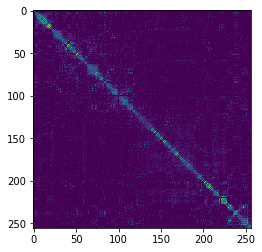

In [6]:
plt.imshow(input_features[pdb_list[0]][6].astype(float).reshape((256,256)))

(array([1.4943e+05, 3.7730e+03, 7.7400e+02, 3.2900e+02, 1.8300e+02,
        8.6000e+01, 4.5000e+01, 1.9000e+01, 6.0000e+00, 5.0000e+00]),
 array([0.     , 0.59985, 1.1997 , 1.79955, 2.3994 , 2.99925, 3.5991 ,
        4.19895, 4.7988 , 5.39865, 5.9985 ]),
 <a list of 10 Patch objects>)

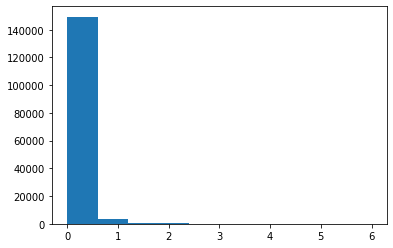

In [14]:
plt.hist(df["freecontact"])